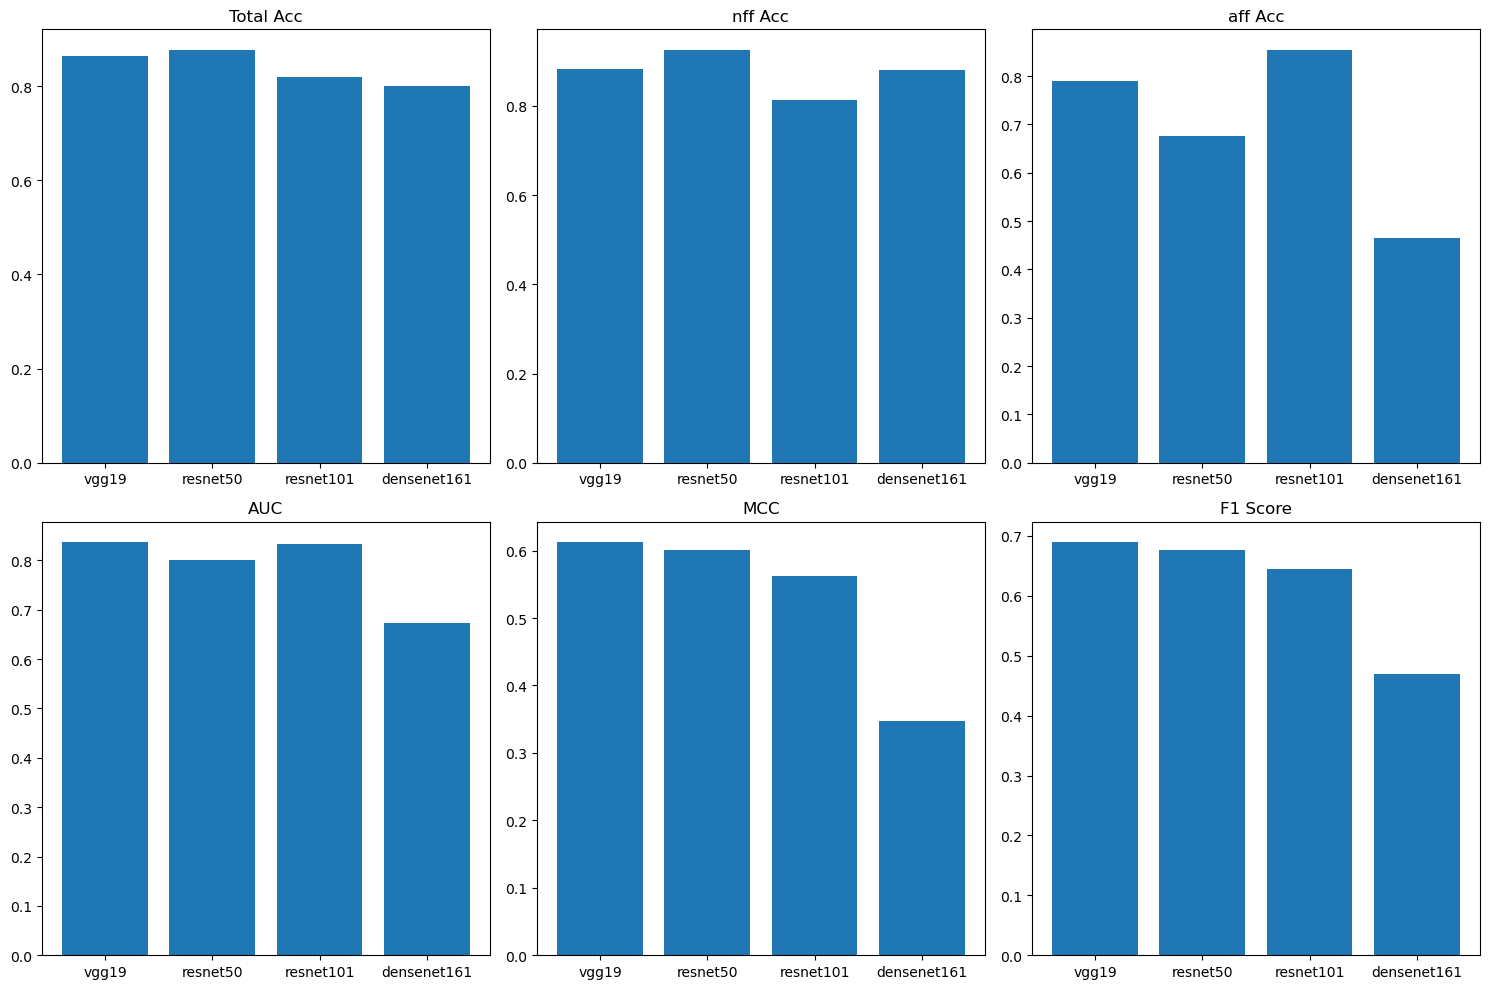

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 定义模型名称和性能指标数据
models = ['vgg19', 'resnet50', 'resnet101', 'densenet161']

metrics = {
    'Total Acc': [0.864, 0.877, 0.82, 0.801],
    'nff Acc': [0.882, 0.925, 0.812, 0.88],
    'aff Acc': [0.79, 0.675, 0.854, 0.464],
    'AUC': [0.836, 0.8, 0.833, 0.672],
    'MCC': [0.612, 0.601, 0.563, 0.348],
    'F1 Score': [0.689, 0.677, 0.644, 0.47]
}

# 设置子图布局
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# 绘制每个性能指标的条形图
for i, (metric, values) in enumerate(metrics.items()):
    row, col = divmod(i, 3)
    axs[row, col].bar(models, values)
    axs[row, col].set_title(metric)

# 调整布局
plt.tight_layout()
plt.show()


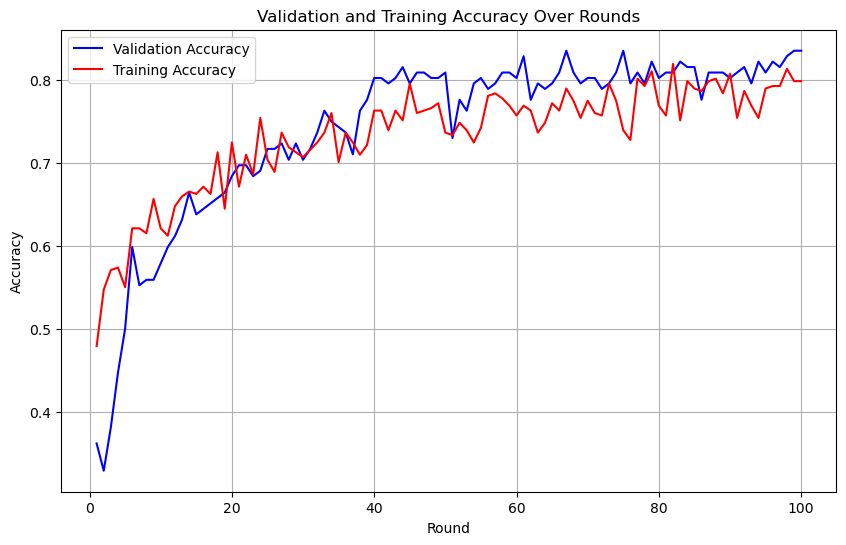

In [34]:
import re
import matplotlib.pyplot as plt
import numpy as np

# 从日志文件中读取内容
log_file_path = '/local/data1/honzh073/data/suzuki/(fedavg)densenet161_data1/log.txt'

with open(log_file_path, 'r') as log_file:
    log_content = log_file.read()

# 使用正则表达式匹配 "Validation Accuracy" 和 "Training Accuracy" 后面的数字
validation_pattern = r'Validation Accuracy: (\d+\.\d+)'
training_pattern = r'Training Accuracy: (\d+\.\d+)'

validation_matches = re.findall(validation_pattern, log_content)
training_matches = re.findall(training_pattern, log_content)

# 转换匹配到的字符串为浮点数列表
validation_accuracy = [float(match) for match in validation_matches]
training_accuracy = [float(match) for match in training_matches]

# 合并每两个值并计算平均值
def average_every_two(data):
    return [(x + y) / 2 for x, y in zip(data[0::2], data[1::2])]

# 对训练和验证数据进行合并和平均处理
merged_and_averaged_validation = average_every_two(validation_accuracy)
merged_and_averaged_training = average_every_two(training_accuracy)

# 计算新的 epochs
merged_epochs = range(1, len(merged_and_averaged_validation) + 1)

# 创建一个大的 subplot
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制合并并平均处理后的学习曲线
ax.plot(merged_epochs, merged_and_averaged_validation, marker='', linestyle='-', color='b', label='Validation Accuracy')
ax.plot(merged_epochs, merged_and_averaged_training, marker='', linestyle='-', color='r', label='Training Accuracy')

ax.set_title('Validation and Training Accuracy Over Rounds')
ax.set_xlabel('Round')
ax.set_ylabel('Accuracy')
ax.legend()
ax.grid(True)

plt.show()


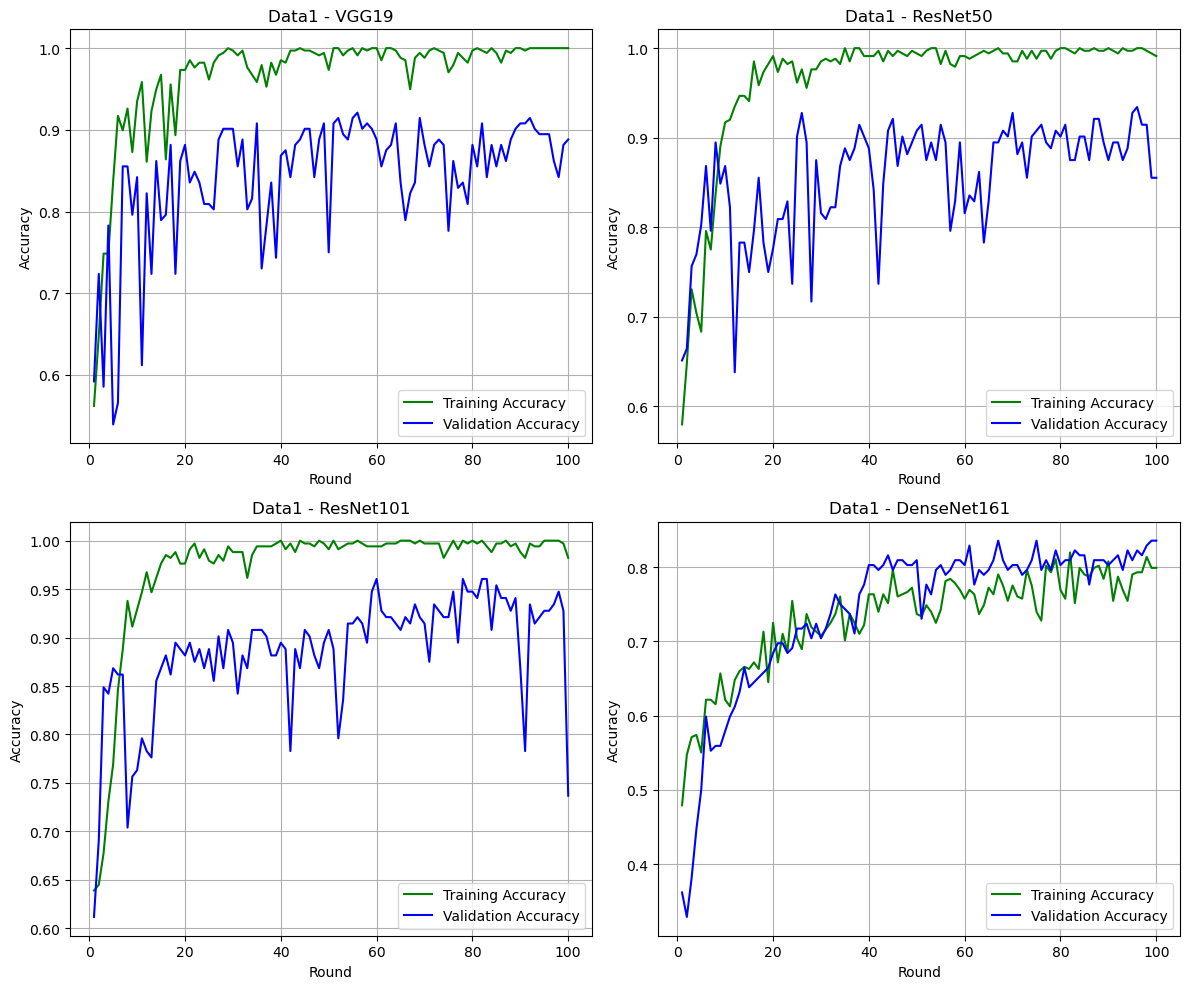

In [2]:
import re
import matplotlib.pyplot as plt
import numpy as np

# List of log file paths and corresponding model names
log_file_paths = [
    ('/local/data1/honzh073/data/suzuki/(fedavg)vgg19_data1/log.txt', 'VGG19'),
    ('/local/data1/honzh073/data/suzuki/(fedavg)resnet50_data1/log.txt', 'ResNet50'),
    ('/local/data1/honzh073/data/suzuki/(fedavg)resnet101_data1/log.txt', 'ResNet101'),
    ('/local/data1/honzh073/data/suzuki/(fedavg)densenet161_data1/log.txt', 'DenseNet161')
]

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # Adjust figsize as needed

for i, (log_file_path, model_name) in enumerate(log_file_paths):
    with open(log_file_path, 'r') as log_file:
        log_content = log_file.read()

    # 使用正则表达式匹配 "Validation Accuracy" 和 "Training Accuracy" 后面的数字
    validation_pattern = r'Validation Accuracy: (\d+\.\d+)'
    training_pattern = r'Training Accuracy: (\d+\.\d+)'

    validation_matches = re.findall(validation_pattern, log_content)
    training_matches = re.findall(training_pattern, log_content)

    # 转换匹配到的字符串为浮点数列表
    validation_accuracy = [float(match) for match in validation_matches]
    training_accuracy = [float(match) for match in training_matches]

    # 合并每两个值并计算平均值
    def average_every_two(data):
        return [(x + y) / 2 for x, y in zip(data[0::2], data[1::2])]

    # 对训练和验证数据进行合并和平均处理
    merged_and_averaged_validation = average_every_two(validation_accuracy)
    merged_and_averaged_training = average_every_two(training_accuracy)

    # 计算新的 epochs
    merged_epochs = range(1, len(merged_and_averaged_validation) + 1)

    # Determine the subplot indices
    row_index = i // 2
    col_index = i % 2

    # 绘制合并并平均处理后的学习曲线
    axs[row_index, col_index].plot(merged_epochs, merged_and_averaged_training, marker='', linestyle='-', color='green', label='Training Accuracy')
    axs[row_index, col_index].plot(merged_epochs, merged_and_averaged_validation, marker='', linestyle='-', color='b', label='Validation Accuracy')

    # 设置标题和标签
    # 设置标题和标签
    axs[row_index, col_index].set_title(f'Data1 - {model_name}')
    axs[row_index, col_index].set_xlabel('Round')
    axs[row_index, col_index].set_ylabel('Accuracy')
    axs[row_index, col_index].legend(loc='lower right')
    axs[row_index, col_index].grid(True)

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()

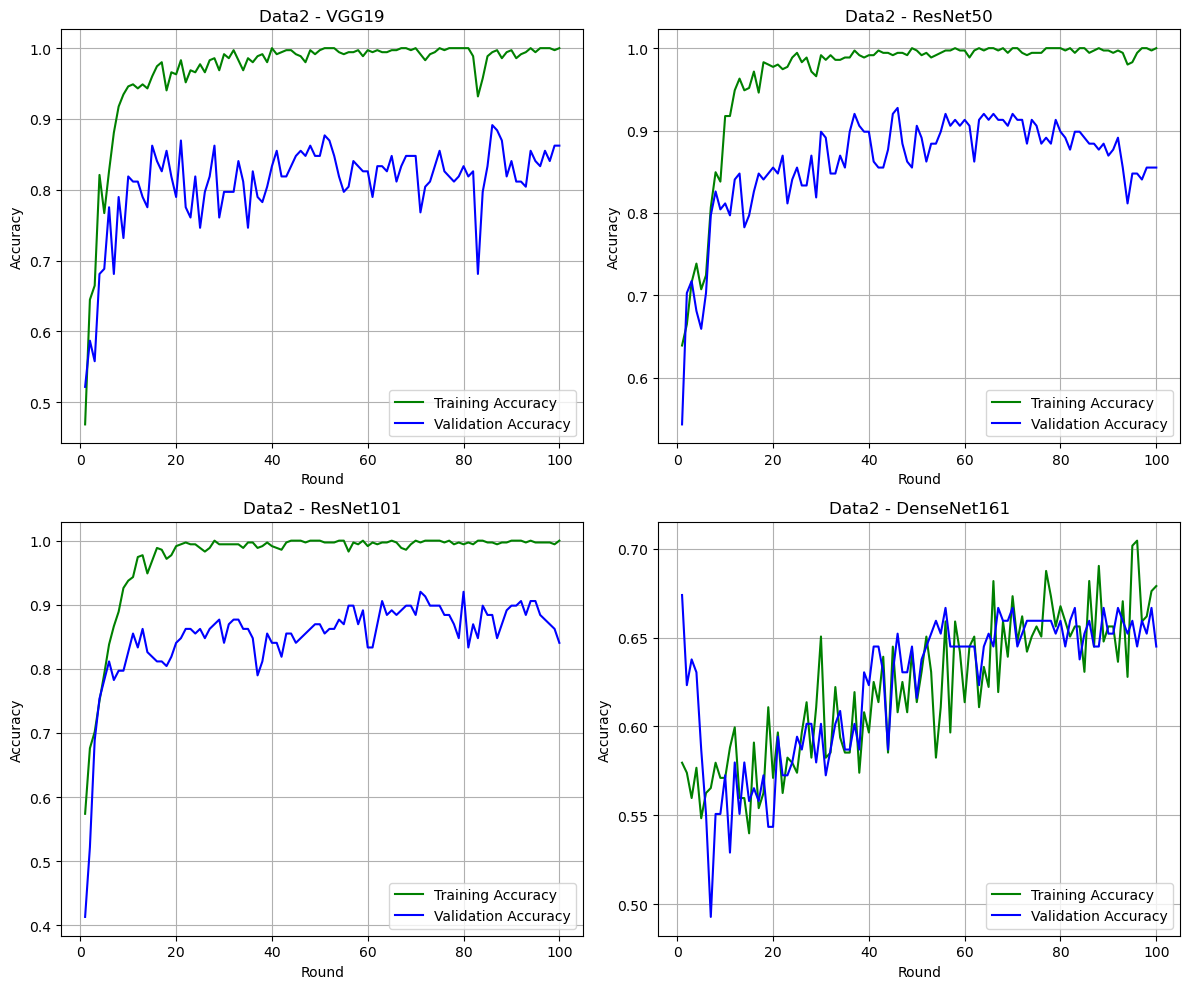

In [2]:
import re
import matplotlib.pyplot as plt
import numpy as np

# List of log file paths and corresponding model names
log_file_paths = [
    ('/local/data1/honzh073/data/suzuki/(fedavg)vgg19_data2/log.txt', 'VGG19'),
    ('/local/data1/honzh073/data/suzuki/(fedavg)resnet50_data2/log.txt', 'ResNet50'),
    ('/local/data1/honzh073/data/suzuki/(fedavg)_resnet101_data22/log.txt', 'ResNet101'),
    ('/local/data1/honzh073/data/suzuki/(fedavg)densenet161_data2/log.txt', 'DenseNet161')
]

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # Adjust figsize as needed

for i, (log_file_path, model_name) in enumerate(log_file_paths):
    with open(log_file_path, 'r') as log_file:
        log_content = log_file.read()

    # 使用正则表达式匹配 "Validation Accuracy" 和 "Training Accuracy" 后面的数字
    validation_pattern = r'Validation Accuracy: (\d+\.\d+)'
    training_pattern = r'Training Accuracy: (\d+\.\d+)'

    validation_matches = re.findall(validation_pattern, log_content)
    training_matches = re.findall(training_pattern, log_content)

    # 转换匹配到的字符串为浮点数列表
    validation_accuracy = [float(match) for match in validation_matches]
    training_accuracy = [float(match) for match in training_matches]

    # 合并每两个值并计算平均值
    def average_every_two(data):
        return [(x + y) / 2 for x, y in zip(data[0::2], data[1::2])]

    # 对训练和验证数据进行合并和平均处理
    merged_and_averaged_validation = average_every_two(validation_accuracy)
    merged_and_averaged_training = average_every_two(training_accuracy)

    # 计算新的 epochs
    merged_epochs = range(1, len(merged_and_averaged_validation) + 1)

    # Determine the subplot indices
    row_index = i // 2
    col_index = i % 2

    # 绘制合并并平均处理后的学习曲线
    axs[row_index, col_index].plot(merged_epochs, merged_and_averaged_training, marker='', linestyle='-', color='green', label='Training Accuracy')
    axs[row_index, col_index].plot(merged_epochs, merged_and_averaged_validation, marker='', linestyle='-', color='b', label='Validation Accuracy')

    # 设置标题和标签
    # 设置标题和标签
    axs[row_index, col_index].set_title(f'Data2 - {model_name}')
    axs[row_index, col_index].set_xlabel('Round')
    axs[row_index, col_index].set_ylabel('Accuracy')
    axs[row_index, col_index].legend(loc='lower right')
    axs[row_index, col_index].grid(True)

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()